In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Foundations of Deep Learning and AI/train.csv')


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [35]:
Y_train

array([7, 1, 6, ..., 7, 0, 6])

In [36]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [38]:
def compute_loss(A2, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    log_probs = -np.log(A2[one_hot_Y.astype(bool)])
    loss = np.sum(log_probs) / m
    return loss


In [39]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    losses = []
    accuracies = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        loss = compute_loss(A2, Y)
        losses.append(loss)
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, Y)
        accuracies.append(accuracy)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print(f"Iteration: {i}, Loss: {loss}, Accuracy: {accuracy}")
    return W1, b1, W2, b2, losses, accuracies

In [40]:
W1, b1, W2, b2, losses_original, accuracies_original = gradient_descent(X_train, Y_train, 0.10, 500)

[6 9 9 ... 6 6 9] [7 1 6 ... 7 0 6]
Iteration: 0, Loss: 3.162026251505216, Accuracy: 0.09192682926829268
[6 9 9 ... 6 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
Iteration: 10, Loss: 2.2431674669730635, Accuracy: 0.2136341463414634
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 9 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 1 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 1 9 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 1 4 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 1 4 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 1 4 ... 3 6 9] [7 1 6 ... 7 0 6]
[6 1 4 ... 3 6 9] [7 1 6 ... 7 0 6]
Iteration: 20, Loss: 1.9813872841899602, Accuracy: 0.31446341463414634
[6 1 4 ... 3 6 9] [7 1 6 ... 7 0 6

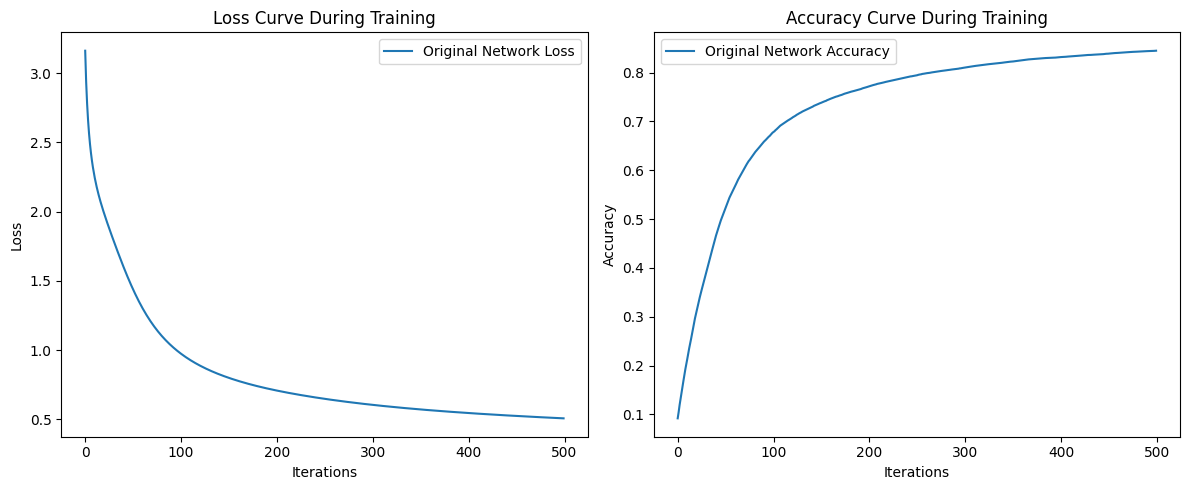

In [41]:
# Loss curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_original, label="Original Network Loss")
plt.title("Loss Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracies_original, label="Original Network Accuracy")
plt.title("Accuracy Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [7]
Label:  7


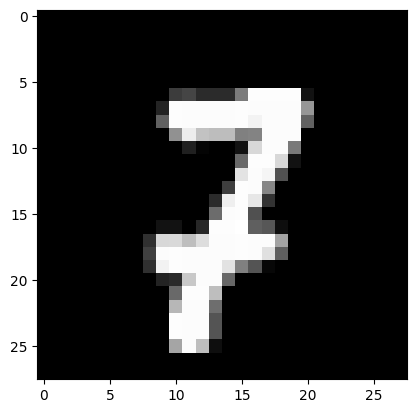

Prediction:  [1]
Label:  1


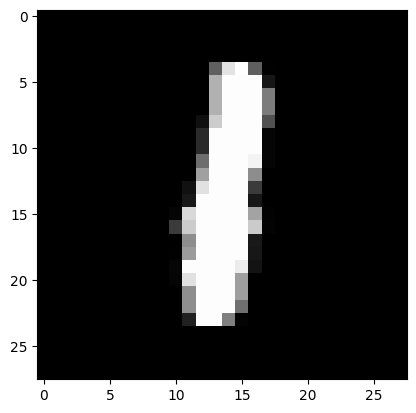

Prediction:  [6]
Label:  6


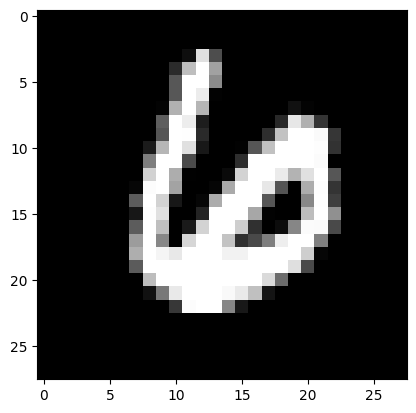

Prediction:  [3]
Label:  3


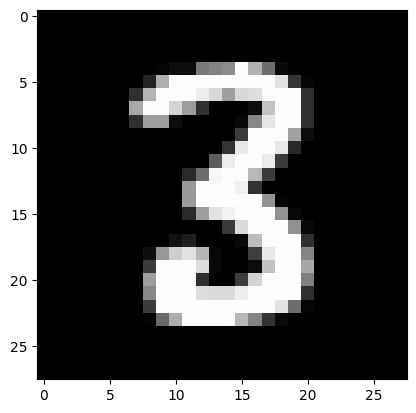

In [43]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


In [44]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[5 1 3 1 1 3 8 4 1 8 1 8 3 7 9 8 3 3 4 6 2 8 8 6 1 6 8 7 4 6 5 5 7 7 3 6 0
 5 3 8 4 8 6 5 1 0 7 3 0 8 7 1 9 5 7 3 4 9 1 6 4 3 3 4 9 0 9 7 4 6 5 7 7 8
 6 7 9 2 2 2 7 7 1 2 0 4 4 0 1 0 7 8 6 0 1 1 7 7 1 2 9 1 8 6 4 4 3 0 6 6 0
 2 2 1 0 6 2 9 2 8 6 6 0 7 0 0 2 2 3 7 7 3 9 0 6 2 6 1 6 0 9 4 0 3 9 1 5 2
 9 5 2 2 1 9 5 4 1 8 3 1 3 7 3 0 8 6 3 1 3 7 2 2 6 7 2 7 3 0 8 4 9 5 7 0 8
 1 4 3 8 1 5 0 5 8 0 8 0 6 6 0 6 6 8 5 7 7 5 7 4 2 5 6 2 4 1 7 6 8 6 0 1 0
 7 7 8 0 7 5 8 6 0 0 6 7 6 6 4 8 1 9 3 6 6 6 1 5 3 4 2 6 1 7 6 4 1 6 7 1 3
 1 7 4 1 5 9 7 7 7 3 9 7 5 1 3 9 1 2 6 1 3 7 1 5 0 3 6 8 6 6 2 6 0 1 8 9 7
 4 2 5 3 2 1 1 6 8 0 7 1 9 7 8 8 2 7 7 9 9 5 7 8 4 4 7 9 8 8 7 4 6 1 4 8 1
 7 8 6 8 3 9 1 2 6 4 0 0 7 6 2 7 4 3 4 9 3 7 6 6 0 8 9 8 5 1 2 8 8 1 3 0 3
 4 8 3 3 9 6 6 1 6 2 6 2 1 2 2 8 0 0 1 0 9 2 9 9 9 1 0 2 2 1 5 6 8 8 2 1 1
 6 8 5 7 2 1 0 4 0 0 6 7 7 4 4 4 3 8 2 3 4 6 7 3 2 0 8 4 3 6 4 3 9 1 3 9 7
 2 6 5 8 0 6 4 3 6 3 7 9 7 7 4 3 3 6 7 6 2 3 2 9 5 1 8 7 4 4 9 3 5 6 8 5 2
 0 0 9 1 5 8 1 4 3 4 0 2 

0.846